Creating a plot using different packages: matplotlib, pandas, seaborn

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#getting data
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
col_names = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin","car_name"]
data = pd.read_csv(url,names=col_names,delim_whitespace=True)

In [3]:
data.sort('weight',inplace=True)
data.head()

/Users/Ken/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
54,35.0,4,72.0,69.00,1613.0,18.0,71,3,datsun 1200
144,31.0,4,76.0,52.00,1649.0,16.5,74,3,toyota corona
343,39.1,4,79.0,58.00,1755.0,16.9,81,3,toyota starlet
345,35.1,4,81.0,60.00,1760.0,16.1,81,3,honda civic 1300
53,31.0,4,71.0,65.00,1773.0,19.0,71,3,toyota corolla 1200


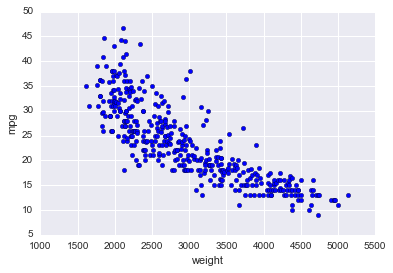

In [4]:
#matplotlib plot
plt.scatter(data.weight,data.mpg)
plt.xlabel('weight')
plt.ylabel('mpg')

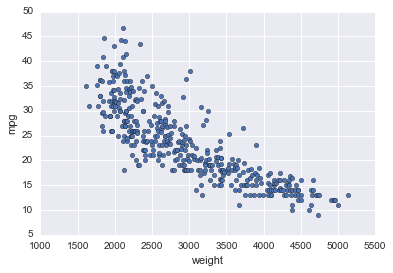

In [5]:
#pandas plot
data.plot(kind='scatter',x='weight',y='mpg')

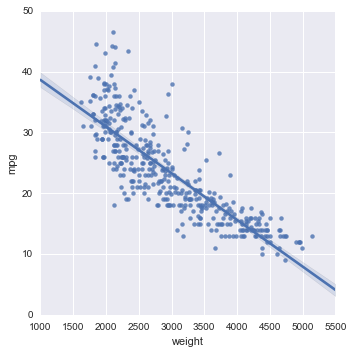

In [6]:
sns.lmplot(x='weight',y='mpg',data=data)

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
feature_col = ['weight']
X = data[feature_col]
y = data.mpg
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
#making prediction using our model
data['predicted'] = lm.predict(X)

In [9]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,predicted
54,35.0,4,72.0,69.00,1613.0,18.0,71,3,datsun 1200,33.934992
144,31.0,4,76.0,52.00,1649.0,16.5,74,3,toyota corona,33.658634
343,39.1,4,79.0,58.00,1755.0,16.9,81,3,toyota starlet,32.844914
345,35.1,4,81.0,60.00,1760.0,16.1,81,3,honda civic 1300,32.806531
53,31.0,4,71.0,65.00,1773.0,19.0,71,3,toyota corolla 1200,32.706735


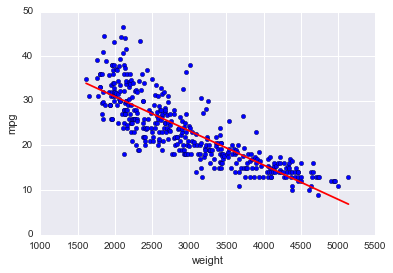

In [10]:
#putting all together
plt.scatter(data.weight,data.mpg)
plt.plot(data.weight,data.predicted,color='red')
plt.xlabel('weight')
plt.ylabel('mpg')

In [11]:
#getting the slope and intercept
b0 = lm.intercept_
b1 = lm.coef_

In [12]:
b0

46.317364420265648

In [13]:
b1

array([-0.00767661])

In [14]:
# linear model: y_hat = 46.317 -0.00768x
# if x=1000
46.317-0.00768*1000

38.637

In [16]:
#using build-in function
lm.predict(1000)

array([ 38.64075436])